In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

# Path to the ZIP file
zip_path = "/content/drive/MyDrive/arch-20250122T141841Z-001.zip"  # Update with your actual file path
extract_path = "/content/dataset"  # Target directory for extraction

# Unzip the file
os.system(f"unzip -q {zip_path} -d {extract_path}")
print(f"✅ Dataset extracted to: {extract_path}")

✅ Dataset extracted to: /content/dataset


Found 3170 images belonging to 8 classes.
Found 787 images belonging to 8 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1575s 16s/step - accuracy: 0.1857 - loss: 2.0418 - val_accuracy: 0.2656 - val_loss: 1.9111
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 188ms/step - accuracy: 0.2979 - loss: 1.8061 - val_accuracy: 0.3126 - val_loss: 1.8359
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.3284 - loss: 1.6969 - val_accuracy: 0.2910 - val_loss: 1.8590
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 182ms/step - accuracy: 0.3938 - loss: 1.6070 - val_accuracy: 0.4003 - val_loss: 1.7295
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 190ms/step - accuracy: 0.4024 - loss: 1.5770 - val_accuracy: 0.3672 - val_loss: 1.7153
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.4330 - loss: 1.5194 - val_accuracy: 0.4053 - val_loss: 1.6142
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.4542 - loss: 1.4637 - val_accuracy: 0.3875 - val_loss: 1.6214
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.4436 - loss: 1

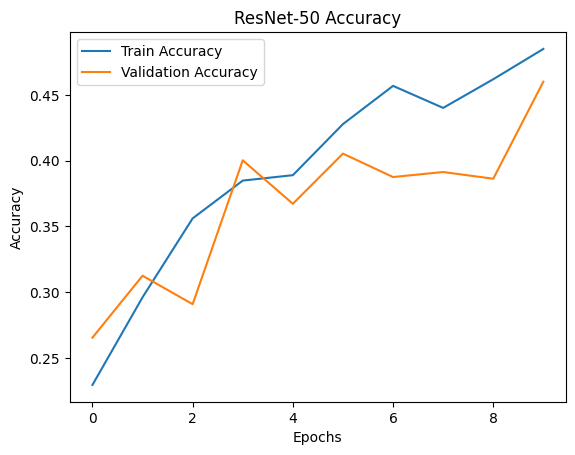

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.4418 - loss: 1.5262
ResNet-50 - Accuracy: 46.00% | Loss: 1.5120


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Dataset path
dataset_path = "/content/drive/MyDrive/arch"

# Image settings
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(dataset_path, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='training')
val_generator = datagen.flow_from_directory(dataset_path, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', subset='validation')

num_classes = len(train_generator.class_indices)

# Create ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=IMAGE_SIZE + (3,))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)
model.save("ResNet50_model.h5")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet-50 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate
loss, accuracy = model.evaluate(val_generator)
print(f"ResNet-50 - Accuracy: {accuracy * 100:.2f}% | Loss: {loss:.4f}")


Testing model: ResNet-50...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
ResNet-50 - Predicted Class: Powdery Mildew, Confidence: 34.33%


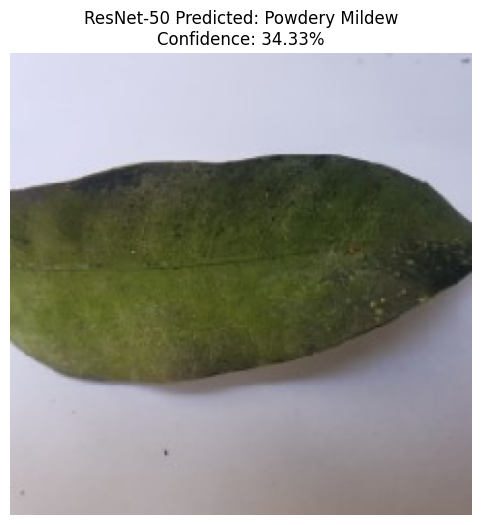


All Models' Predictions:
ResNet-50 - Predicted Class: Powdery Mildew, Confidence: 34.33%


In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Function to load and preprocess the image
def preprocess_image(image_path, target_size=(224, 224)):
    img = image.load_img(image_path, target_size=target_size)  # Resize to match model input
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims for batch size
    img_array = img_array / 255.0  # Normalize pixel values
    return img_array, img

# Function to make predictions with a given model
def make_prediction(model, img_array):
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    confidence = np.max(predictions) * 100  # Confidence percentage
    return predicted_class_index, confidence

# Define the models you trained
models = {
    "ResNet-50": tf.keras.models.load_model("/content/ResNet50_model.h5")

}

# Path to the test image
image_path = "/content/20211109_121223 (Custom) (1).jpg"  # Update with your test image path

# Preprocess the image
img_array, img = preprocess_image(image_path)

# Get class labels from the training generator
class_labels = list(train_generator.class_indices.keys())

# Dictionary to store predictions and confidences
predictions_dict = {}

# Iterate through all models and make predictions
for model_name, model in models.items():
    print(f"Testing model: {model_name}...")

    # Make prediction
    predicted_class_index, confidence = make_prediction(model, img_array)

    # Get the predicted class name
    predicted_class_name = class_labels[predicted_class_index]

    # Store the prediction and confidence
    predictions_dict[model_name] = {
        "predicted_class": predicted_class_name,
        "confidence": confidence
    }

    # Display the result for each model
    print(f"{model_name} - Predicted Class: {predicted_class_name}, Confidence: {confidence:.2f}%")

    # Display the image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{model_name} Predicted: {predicted_class_name}\nConfidence: {confidence:.2f}%")
    plt.show()

# Final output of all models' predictions
print("\nAll Models' Predictions:")
for model_name, result in predictions_dict.items():
    print(f"{model_name} - Predicted Class: {result['predicted_class']}, Confidence: {result['confidence']:.2f}%")


Found 787 images belonging to 8 classes.
Evaluating ResNet-50...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 278ms/step

ResNet-50 Classification Report:
                  precision    recall  f1-score   support

     Anthracnose       0.10      0.11      0.10        84
Bacterial Canker       0.33      0.31      0.32       101
  Cutting Weevil       0.93      0.75      0.83       100
        Die Back       0.43      0.88      0.58       100
      Gall Midge       0.63      0.19      0.29       100
         Healthy       0.80      0.52      0.63       102
  Powdery Mildew       0.55      0.24      0.33       100
     Sooty Mould       0.36      0.63      0.46       100

        accuracy                           0.46       787
       macro avg       0.52      0.45      0.44       787
    weighted avg       0.52      0.46      0.45       787



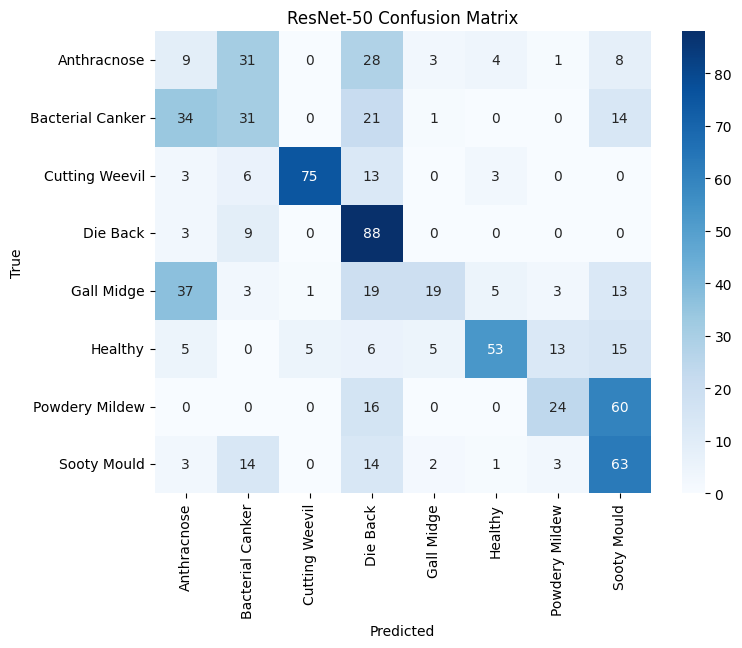


All Models' Metrics:

ResNet-50:
  - Accuracy: 46.00%
  - Precision (Weighted): 0.5249
  - Recall (Weighted): 0.4600
  - F1-Score (Weighted): 0.4501


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `test_generator` contains the test dataset
# test_generator is prepared similar to train_generator with ImageDataGenerator
test_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',  # Use the validation set for evaluation
    shuffle=False  # Keep data in order for proper evaluation
)

# Extract true labels and predictions
y_true = test_generator.classes  # Ground truth labels
class_labels = list(test_generator.class_indices.keys())  # Class label names

# Initialize a dictionary to store metrics for each model
metrics_dict = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Get predictions from the model
    y_pred_probs = model.predict(test_generator)  # Predict probabilities
    y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices

    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Precision, Recall, F1 Score (weighted for imbalanced datasets)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Store metrics
    metrics_dict[model_name] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    }

    # Print Classification Report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_labels))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Output the collected metrics for all models
print("\nAll Models' Metrics:")
for model_name, metrics in metrics_dict.items():
    print(f"\n{model_name}:")
    print(f"  - Accuracy: {metrics['accuracy'] * 100:.2f}%")
    print(f"  - Precision (Weighted): {metrics['precision']:.4f}")
    print(f"  - Recall (Weighted): {metrics['recall']:.4f}")
    print(f"  - F1-Score (Weighted): {metrics['f1_score']:.4f}")
